In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/tree_rf.pkl")
res_ex = load_pickle_zip("../models/solutions/tree_rf.pkl")

In [4]:
betas = res_ex["betas"]

In [46]:
model_.N

15

In [5]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=10000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.174 std_fe: 8.70E-02 M: 0.007 S: 0.693 E: 0.009M: 0.0168, B1 = -0.000004
fe: -7.116 std_fe: 9.92E-06 M: 0.148 S: 0.676 E: -0.359: 0.158, B1 = -0.340
fe: -3.810 std_fe: 9.94E-06 M: 0.269 S: 0.634 E: -0.642: 0.28, B1 = -0.6555
fe: -2.791 std_fe: 1.02E-05 M: 0.364 S: 0.580 E: -0.857: 0.372, B1 = -0.934
fe: -2.328 std_fe: 9.43E-06 M: 0.460 S: 0.523 E: -1.021: 0.46, B1 = -1.1711
fe: -2.080 std_fe: 1.09E-05 M: 0.539 S: 0.469 E: -1.141: 0.552, B1 = -1.376
fe: -1.933 std_fe: 1.00E-05 M: 0.616 S: 0.411 E: -1.248: 0.602, B1 = -1.567
fe: -1.840 std_fe: 9.85E-06 M: 0.676 S: 0.363 E: -1.322: 0.664, B1 = -1.758
fe: -1.779 std_fe: 9.78E-06 M: 0.724 S: 0.321 E: -1.378: 0.725, B1 = -1.955
fe: -1.738 std_fe: 8.61E-05 M: 0.767 S: 0.282 E: -1.425: 0.773, B1 = -2.162
fe: -1.708 std_fe: 1.01E-05 M: 0.801 S: 0.245 E: -1.463: 0.794, B1 = -2.378
fe: -1.687 std_fe: 1.10E-05 M: 0.827 S: 0.218 E: -1.489: 0.837, B1 = -2.601
fe: -1.671 std_fe: 5.14E-05 M: 0.851 S: 0.192 E: -1.511: 0.848, B1 = -2.829
fe:

In [ ]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=10000,
                           bias = True, z2 = False, 
                           x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

In [7]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -7.116, ener: -0.357, M: 0.147, iter 5
fe: -3.810, ener: -0.639, M: 0.266, iter 5
fe: -2.791, ener: -0.856, M: 0.366, iter 5
fe: -2.328, ener: -1.020, M: 0.458, iter 5
fe: -2.080, ener: -1.147, M: 0.542, iter 5
fe: -1.933, ener: -1.245, M: 0.614, iter 5
fe: -1.840, ener: -1.321, M: 0.675, iter 5
fe: -1.779, ener: -1.380, M: 0.726, iter 5
fe: -1.738, ener: -1.426, M: 0.767, iter 5
fe: -1.708, ener: -1.461, M: 0.800, iter 5
fe: -1.687, ener: -1.489, M: 0.828, iter 5
fe: -1.671, ener: -1.510, M: 0.850, iter 5
fe: -1.660, ener: -1.526, M: 0.868, iter 5
fe: -1.651, ener: -1.540, M: 0.883, iter 5
fe: -1.644, ener: -1.550, M: 0.895, iter 5
fe: -1.638, ener: -1.559, M: 0.906, iter 5
fe: -1.634, ener: -1.565, M: 0.915, iter 5
fe: -1.630, ener: -1.571, M: 0.923, iter 5
fe: -1.627, ener: -1.576, M: 0.929, iter 5


In [9]:
from save_data import save_pickle_zip
name_file="tree_rf"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [47]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_bp = all_res["bp"]

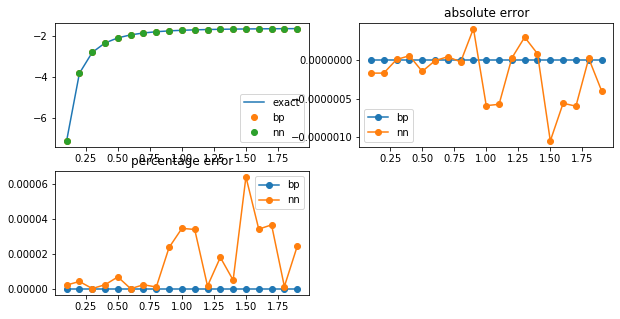

In [11]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn], init_=1)
#plt.ylim(-0.001,0.11)
plt.show()

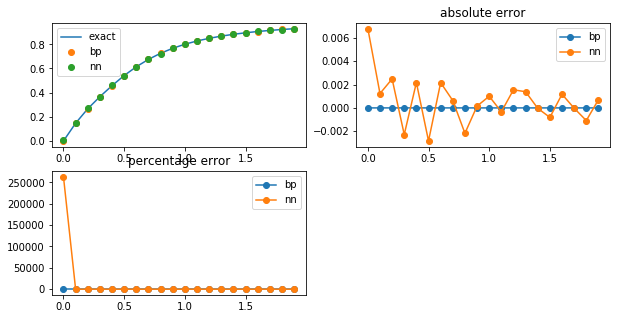

In [12]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn])
plt.show()

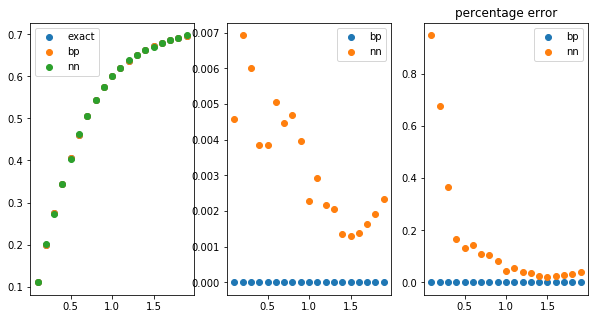

In [15]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn], init_=1)
plt.show()

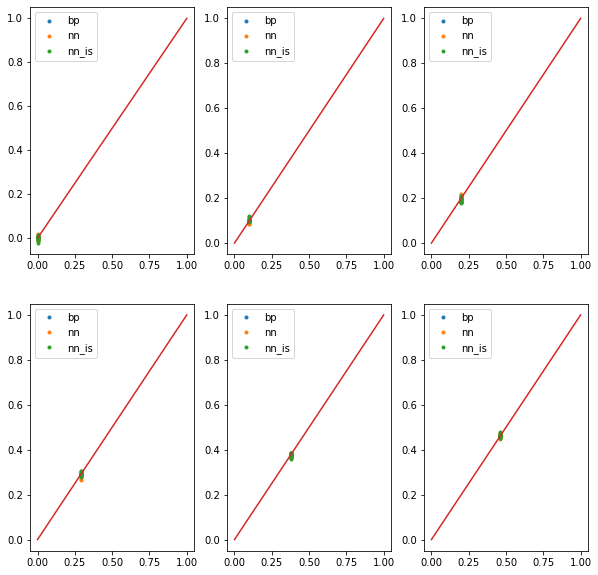

In [27]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

# Images

<function matplotlib.pyplot.show(*args, **kw)>

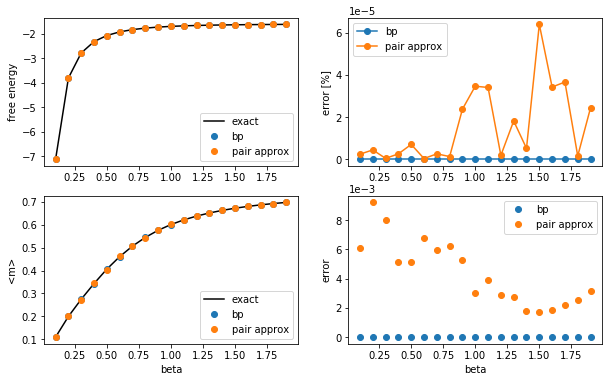

In [48]:
import matplotlib.pyplot as plt
init_ =1
name_file = "tree_rf.pdf"
label="fe"

others = [res_bp, res_nn]
res_nn["name"] = "pair approx"
plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

others = [res_bp, res_nn]

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/len(res_ex[label]),
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/len(other[label]), "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

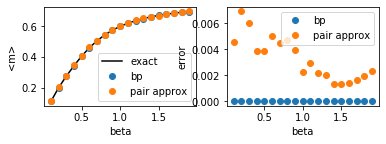